In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data

In [2]:
#Reading the dataset
dataset = pd.read_csv("ecommercesales.csv")

In [3]:
dataset.head(15)

,Facebook,Twitter,GoogleAds,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


## Data Pre-Processing

In [4]:
How many rows an columns have the dataset?

In [ ]:
How many rows an columns have the dataset

In [5]:
dataset.shape

(200, 4)

1. Checking for missing values

In [6]:
dataset.isna().sum()

Facebook     0
Twitter      0
GoogleAds    0
Sales        0
dtype: int64

### There are no missing values...

In [7]:
dataset.duplicated().any()

False

## There are no duplicates

### Conclusion: There are no duplicate rows present in the dataset

# 3. Checking for outliers

C:\Users\pabli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


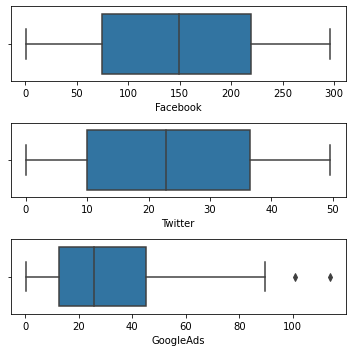

In [8]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['Facebook'], ax = axs[0])
plt2 = sns.boxplot(dataset['Twitter'], ax = axs[1])
plt3 = sns.boxplot(dataset['GoogleAds'], ax = axs[2])
plt.tight_layout()

## Exploratory Data Analysis
### 1. Distribution of the target variable

C:\Users\pabli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


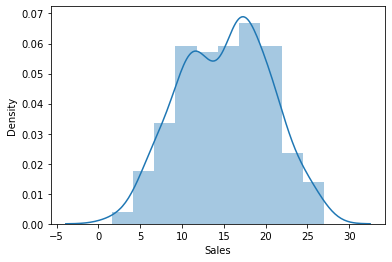

In [9]:
sns.distplot(dataset['Sales']);

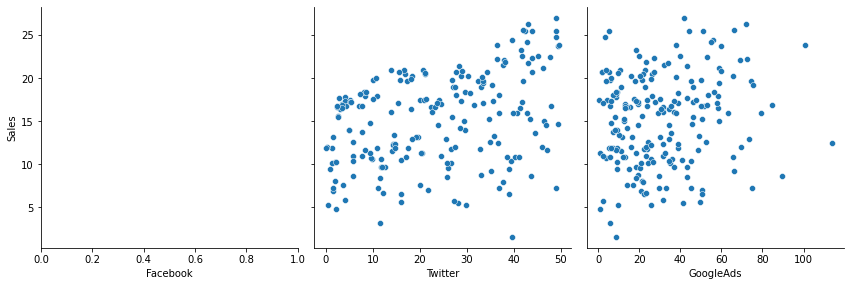

In [10]:
sns.pairplot(dataset, x_vars=['Facebook', 'Twitter', 'GoogleAds'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

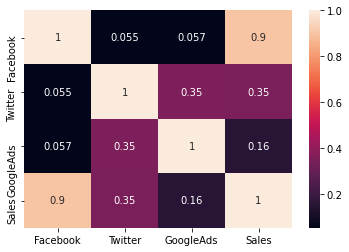

In [11]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
#Setting the value for X and Y
x = dataset[['Facebook']]
y = dataset['Sales']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [16]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [17]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  6.948683200001357
Coefficient: [0.05454575]


In [19]:
print('Regression Equation: Sales = 6.948 + 0.054 * Facebook')

Regression Equation: Sales = 6.948 + 0.054 * Facebook


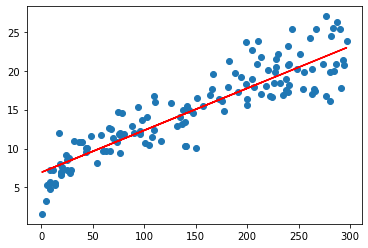

In [20]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [21]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [22]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


In [23]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392
167,17.2,18.228745
116,12.2,14.541452
96,16.7,17.726924
52,22.6,18.752384
69,22.3,18.774202


In [24]:
#Predict for any value
slr.predict([[56]])

array([10.00324536])

In [25]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 81.10


In [26]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.6480589869746527
Mean Square Error: 4.077556371826949
Root Mean Square Error: 2.019296008966231


In [27]:
#Setting the value for X and Y
x = dataset[['Facebook', 'Twitter', 'GoogleAds']]
y = dataset['Sales']

In [28]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)

In [29]:
mlr= LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [30]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

4.334595861728431


[('Facebook', 0.053829108667250075),
 ('Twitter', 0.11001224388558062),
 ('GoogleAds', 0.0062899501461303525)]

In [31]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)

In [ ]:
print("Prediction for test set: {}".format(y_pred_mlr))
